In [1]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.rc('text', usetex = True)

from collections import defaultdict

from sklearn.model_selection import train_test_split

In [2]:
# tmdb data directory
movie_db_directory = "../datasets/tmdb/movie_db"


In [3]:
movies = []

with open(movie_db_directory, "r") as movie_data:
    
    for line in movie_data:
        movie_id, movie_title, movie_summary, movie_genres, movie_rating = json.loads(line)["id"], json.loads(line)["title"], json.loads(line)["summary"], json.loads(line)["genres"], json.loads(line)["rating"]
        movies.append({"id": movie_id, "title": movie_title, "summary": movie_summary, "genres": movie_genres, "rating": movie_rating})
        

In [4]:
len(movies)

901417

In [5]:
movies_df = pd.DataFrame(movies)
movies_df = movies_df[movies_df["rating"] > 0] # remove examples with no rating given
movies_df

,id,title,summary,genres,rating
0,3924,Blondie,Blondie and Dagwood are about to celebrate the...,"[Comedy, Family]",7.063
2,8773,Love at Twenty,Love at Twenty unites five directors from five...,"[Drama, Romance]",6.674
3,25449,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,[],6.000
5,2,Ariel,After the coal mine he works at closes and his...,"[Drama, Comedy, Romance, Crime]",7.092
6,3,Shadows in Paradise,"Nikander, a rubbish collector and would-be ent...","[Drama, Comedy, Romance]",7.302
...,...,...,...,...,...
901234,1254866,Dark Side of the Moon,A lawman and a prisoner play a deadly game ben...,"[Horror, Western]",8.000
901240,1254875,Going,A young family is about to cross the border fr...,[Drama],6.000
901313,1254957,From Sound Check To Stage: Emergency Break,Join Emergency Break on a huge night in the ba...,"[Music, Documentary]",10.000
901330,1254974,Vivante(s),,"[Documentary, Drama]",6.000


In [76]:
# movies_df[movies_df["genres"].map(len) == 13]

In [6]:
# dictionary that keeps the count of movies that are  different number of genres
genres_count = defaultdict(int)

In [7]:
for count in movies_df["genres"].map(len):
    genres_count[count] += 1

In [8]:
print(json.dumps(genres_count, indent = 1))

{
 "2": 92973,
 "0": 42609,
 "4": 11137,
 "3": 44129,
 "1": 151680,
 "5": 2377,
 "6": 436,
 "7": 79,
 "8": 10,
 "9": 3,
 "12": 1,
 "10": 2,
 "11": 1,
 "13": 1
}


###### Distribution of number of tags assigned to every movie

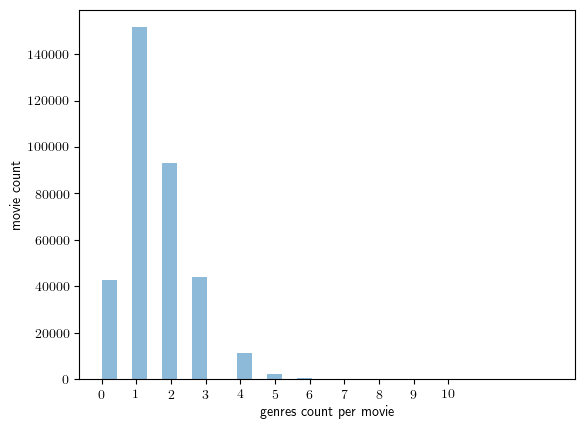

In [9]:
# histogram of number of tags, count number of genre in movies
plt.hist(movies_df["genres"].map(len), bins = 30, alpha = 0.5)

plt.xticks(np.arange(0, 11, 1))

plt.xlabel("genres count per movie")
plt.ylabel("movie count")

plt.show()

###### Distribution of genres in the dataset

In [10]:
# dictionary that stores the count that each genre appears in the dataset
genres_dict = defaultdict(int)

In [11]:
for item in movies_df["genres"]:
    
    if len(item) == 0:
        genres_dict["NonGiven"] += 1
        
    else:
        for genre in item:
            genres_dict[genre] += 1
                

In [12]:
print(json.dumps(genres_dict, indent = 4))

{
    "Comedy": 78317,
    "Family": 16056,
    "Drama": 114907,
    "Romance": 32121,
    "NonGiven": 42609,
    "Crime": 21405,
    "Action": 27799,
    "Thriller": 30039,
    "Documentary": 51870,
    "Adventure": 15072,
    "Science Fiction": 12438,
    "Animation": 22337,
    "Mystery": 11879,
    "Horror": 26862,
    "Fantasy": 12276,
    "War": 6400,
    "Music": 20203,
    "Western": 4811,
    "History": 9087,
    "TV Movie": 15899
}


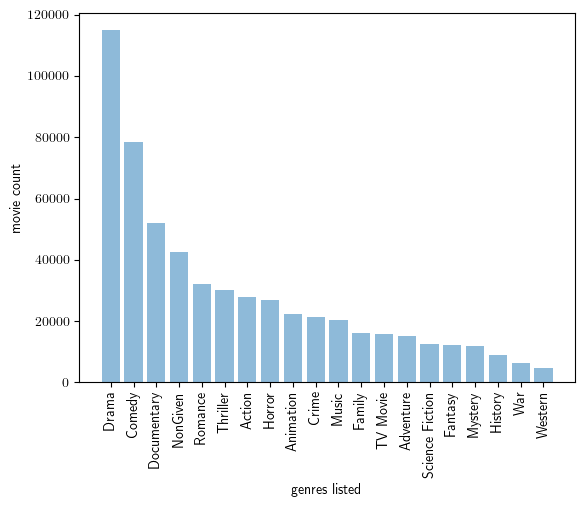

In [13]:
# sort the genres count dictionary by count in descending order and keep the respective keys
sorted_by_genres_count = sorted(genres_dict.items(), key = lambda x: x[1], reverse = True)
genres_list = [item[0] for item in sorted_by_genres_count]
count_list = [item[1] for item in sorted_by_genres_count]

# bar plot with tags, count number of genre in movies
plt.bar(genres_list, count_list, alpha = 0.5)
plt.xticks(rotation = "vertical")

plt.xlabel("genres listed")
plt.ylabel("movie count")

plt.show()

###### Distribution of ratings in the dataset, all genres included

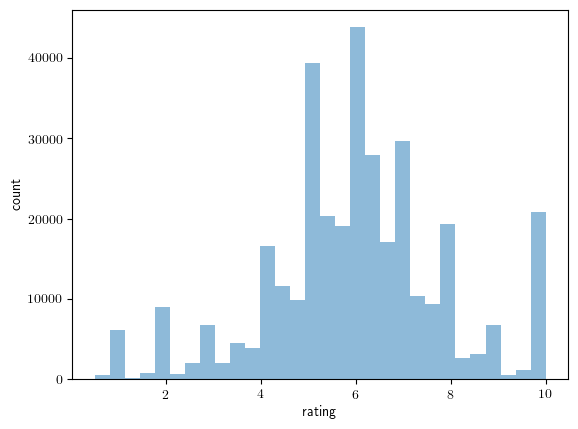

In [14]:
# distribution of ratings for all the movies with rating > 0
plt.hist(movies_df["rating"], bins = 30, alpha = 0.5)

plt.xlabel("rating")
plt.ylabel("count")

plt.show()

###### Distribution of rating for the 4 most popular genres ("Drama", "Comedy", "Documentary", "NonGiven")

In [15]:
def filterByGenre(genre):
    
    return movies_df[movies_df["genres"].map(lambda x: genre in x)]

In [16]:
movies_df_drama = filterByGenre("Drama")
movies_df_comedy = filterByGenre("Comedy")
movies_df_documentary = filterByGenre("Documentary")

# dataset filtered by non given genre
movies_df_nongiven = movies_df[movies_df["genres"].map(lambda x: x == [])]

# movies_df_nongiven

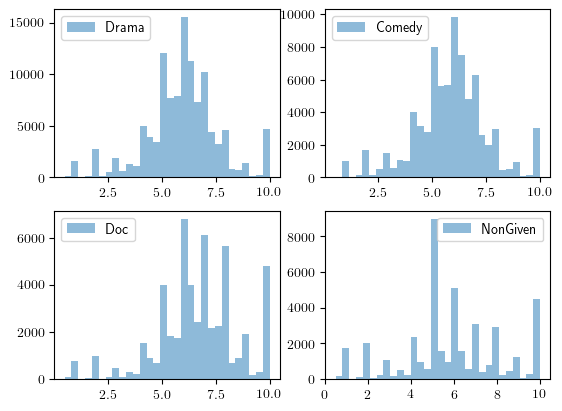

In [17]:
fig, axs = plt.subplots(nrows = 2, ncols = 2)
n_bins = 30

axs[0, 0].hist(movies_df_drama["rating"], bins = n_bins, alpha = 0.5)
axs[0, 0].legend(["Drama"], loc = "best")

axs[0, 1].hist(movies_df_comedy["rating"], bins = n_bins, alpha = 0.5)
axs[0, 1].legend(["Comedy"], loc = "best")

axs[1, 0].hist(movies_df_documentary["rating"], bins = n_bins, alpha = 0.5)
axs[1, 0].legend(["Doc"], loc = "best")

axs[1, 1].hist(movies_df_nongiven["rating"], bins = n_bins, alpha = 0.5)
axs[1, 1].legend(["NonGiven"], loc = "best")

plt.xticks(np.arange(0, 11, 2))

plt.show()

#### Remove movies with no summary 

In [18]:
movies_df = movies_df[movies_df["summary"].map(len) != 0]
movies_df

,id,title,summary,genres,rating
0,3924,Blondie,Blondie and Dagwood are about to celebrate the...,"[Comedy, Family]",7.063
2,8773,Love at Twenty,Love at Twenty unites five directors from five...,"[Drama, Romance]",6.674
3,25449,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,[],6.000
5,2,Ariel,After the coal mine he works at closes and his...,"[Drama, Comedy, Romance, Crime]",7.092
6,3,Shadows in Paradise,"Nikander, a rubbish collector and would-be ent...","[Drama, Comedy, Romance]",7.302
...,...,...,...,...,...
901042,1254651,Valari,What happens when your past comes back to haun...,[],5.000
901234,1254866,Dark Side of the Moon,A lawman and a prisoner play a deadly game ben...,"[Horror, Western]",8.000
901240,1254875,Going,A young family is about to cross the border fr...,[Drama],6.000
901313,1254957,From Sound Check To Stage: Emergency Break,Join Emergency Break on a huge night in the ba...,"[Music, Documentary]",10.000


In [19]:
# normalice spacing in the summaries

# using map
# movies_df["summary"] = movies_df["summary"].map(lambda x: " ".join(x.split()))


# without using map
movies_df["summary"] = movies_df["summary"].str.split().str.join(" ")

/var/folders/sc/c663j6bx65391kdjgk7jy_d00000gn/T/ipykernel_66533/3904288014.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["summary"] = movies_df["summary"].str.split().str.join(" ")


In [20]:
movies_df

,id,title,summary,genres,rating
0,3924,Blondie,Blondie and Dagwood are about to celebrate the...,"[Comedy, Family]",7.063
2,8773,Love at Twenty,Love at Twenty unites five directors from five...,"[Drama, Romance]",6.674
3,25449,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,[],6.000
5,2,Ariel,After the coal mine he works at closes and his...,"[Drama, Comedy, Romance, Crime]",7.092
6,3,Shadows in Paradise,"Nikander, a rubbish collector and would-be ent...","[Drama, Comedy, Romance]",7.302
...,...,...,...,...,...
901042,1254651,Valari,What happens when your past comes back to haun...,[],5.000
901234,1254866,Dark Side of the Moon,A lawman and a prisoner play a deadly game ben...,"[Horror, Western]",8.000
901240,1254875,Going,A young family is about to cross the border fr...,[Drama],6.000
901313,1254957,From Sound Check To Stage: Emergency Break,Join Emergency Break on a huge night in the ba...,"[Music, Documentary]",10.000


#### Map the movie ratings into 3 categories

In [21]:
mean_rating = movies_df["rating"].mean()
std_rating = movies_df["rating"].std()
max_rating = movies_df["rating"].max()

(mean_rating, std_rating)

(5.954123453714966, 1.8560697383173446)

In [22]:
# the rating column is bucketed into three different categories: below average (0), average (1), and above average (2)
# the intervals are defined using the mean and standard deviation of the distribution
# below average rating (0): 0 < rating < (mean - std)
# average rating (1): (mean - std) <= rating <= (mean + std)
# above average rating (2): (mean + std) < rating <= max_rating

movies_df["label"] = pd.cut(movies_df["rating"], 
                                      bins = [0, mean_rating - std_rating, mean_rating + std_rating, max_rating], 
                                      labels = [0, 1, 2])

movies_df.head()

/var/folders/sc/c663j6bx65391kdjgk7jy_d00000gn/T/ipykernel_66533/3357418311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["label"] = pd.cut(movies_df["rating"],


,id,title,summary,genres,rating,label
0,3924,Blondie,Blondie and Dagwood are about to celebrate the...,"[Comedy, Family]",7.063,1
2,8773,Love at Twenty,Love at Twenty unites five directors from five...,"[Drama, Romance]",6.674,1
3,25449,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,[],6.000,1
5,2,Ariel,After the coal mine he works at closes and his...,"[Drama, Comedy, Romance, Crime]",7.092,1
6,3,Shadows in Paradise,"Nikander, a rubbish collector and would-be ent...","[Drama, Comedy, Romance]",7.302,1


In [23]:
movies_df["label"].unique()

[1, 2, 0]
Categories (3, int64): [0 < 1 < 2]

In [24]:
# convert the lists of genres to strings and modify the "genres" column
movies_df["genres_str"] = ["|".join(map(str, l)) for l in movies_df["genres"]]
movies_df = movies_df.drop(columns = ["genres"], axis = 1)
movies_df

/var/folders/sc/c663j6bx65391kdjgk7jy_d00000gn/T/ipykernel_66533/3295555617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["genres_str"] = ["|".join(map(str, l)) for l in movies_df["genres"]]


,id,title,summary,rating,label,genres_str
0,3924,Blondie,Blondie and Dagwood are about to celebrate the...,7.063,1,Comedy|Family
2,8773,Love at Twenty,Love at Twenty unites five directors from five...,6.674,1,Drama|Romance
3,25449,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,6.000,1,
5,2,Ariel,After the coal mine he works at closes and his...,7.092,1,Drama|Comedy|Romance|Crime
6,3,Shadows in Paradise,"Nikander, a rubbish collector and would-be ent...",7.302,1,Drama|Comedy|Romance
...,...,...,...,...,...,...
901042,1254651,Valari,What happens when your past comes back to haun...,5.000,1,
901234,1254866,Dark Side of the Moon,A lawman and a prisoner play a deadly game ben...,8.000,2,Horror|Western
901240,1254875,Going,A young family is about to cross the border fr...,6.000,1,Drama
901313,1254957,From Sound Check To Stage: Emergency Break,Join Emergency Break on a huge night in the ba...,10.000,2,Music|Documentary


In [25]:
# number of movies with no listed genre
condition = movies_df["genres_str"].map(len) == 0
movies_df[condition]

,id,title,summary,rating,label,genres_str
3,25449,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,6.000,1,
422,538,Janine F.,The humorous portrait of a female artist. The ...,5.000,1,
3166,5706,Playboy: Voluptuous Vixens II,Those Vixens are back and bigger than ever. On...,6.167,1,
6978,12174,With a Little Help from Myself,Besieged matriarch Sonia tries to make certain...,5.300,1,
7105,12433,Inland,Algerian filmmaker Tariq Teguia wrote and dire...,6.429,1,
...,...,...,...,...,...,...
899962,1253398,Oh,Working late during spooky season never bodes ...,8.000,2,
900097,1253554,Kenshi V Kitana: Battle of The Realms,"Kenshi Takahashi, having reclaimed his clan's ...",6.000,1,
900795,1254368,"Imbroda, el legado del maestro","Biopic of Javier Imbroda, coach and teacher, w...",8.000,2,
900817,1254395,Missed Conceptions,A woman embarks on a journey to learn about th...,10.000,2,


In [26]:
# assign "NonGiven" to the movies with no listed genre
movies_df.loc[condition, "genres_str"] = "NonGiven"


In [27]:
# shuffle the data by selecting a random sample of the dataset

movies_df = movies_df.sample(frac = 1, replace = False, random_state = 1234)

In [28]:
movies_df = movies_df[movies_df["summary"].map(len) != 0]
movies_df

,id,title,summary,rating,label,genres_str
27222,42184,Eep!,Viegeltje looks like a girl but has wings inst...,5.900,1,Adventure|Family
377106,539115,Náufragos,Odete tries to guess where her husband would b...,5.000,1,Drama
419089,596063,CTRL+ALT+DLT,A hacker gets owned by a mysterious deep web e...,2.400,0,NonGiven
317605,464253,Animelo Summer Live 2015 -THE GATE- 8.29,Second Day of Animelo Summer Live 2015 - THE G...,10.000,2,Music
110985,188360,Who Flung Poo,An artist named Poo paints chicken pot pies wi...,5.500,1,Comedy
...,...,...,...,...,...,...
10121,16784,Welcome to Mooseport,A US president who has retired after two terms...,5.099,1,Comedy
45240,65199,Tokyo Train Girls: Private Lessons,New teacher Chihiro has been on the job for th...,5.000,1,Drama|Romance
741339,1043565,Mindcage,Detectives Jake Doyle and Mary Kelly seek the ...,6.127,1,Mystery|Thriller|Crime
384608,549791,The Lady's Driver,A Lady of the royal family live and breed on t...,5.300,1,Comedy|Drama


#### split dataset into training, validation and test sets

In [29]:
X_data = movies_df[["title", "summary", "genres_str"]]
y_data = movies_df["label"]

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size = 0.4, random_state = 1234)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 1234)

In [36]:
(X_train.shape[0], X_val.shape[0], X_test.shape[0])

(185470, 61824, 61824)

In [106]:
with open("../datasets/training", "a") as outfile:
    
    for i, example in X_train.iterrows():
        movies_example = {
            "title": example["title"],
            "summary": example["summary"],
            "genres": example["genres_str"],
            "label": int(y_train[i]),
        }
        
        outfile.write(json.dumps(movies_example) + "\n")
        
    

In [173]:
# write dataset to a file

movies_df.to_csv("../datasets/movies_df.csv", index = False)

In [174]:
pd.read_csv("../datasets/movies_df.csv")

,id,title,summary,rating,bucketed_rating,genres_str
0,42184,Eep!,Viegeltje looks like a girl but has wings inst...,5.900,1,Adventure|Family
1,539115,Náufragos,Odete tries to guess where her husband would b...,5.000,1,Drama
2,596063,CTRL+ALT+DLT,A hacker gets owned by a mysterious deep web e...,2.400,0,NonGiven
3,464253,Animelo Summer Live 2015 -THE GATE- 8.29,Second Day of Animelo Summer Live 2015 - THE G...,10.000,2,Music
4,188360,Who Flung Poo,An artist named Poo paints chicken pot pies wi...,5.500,1,Comedy
...,...,...,...,...,...,...
309113,16784,Welcome to Mooseport,A US president who has retired after two terms...,5.099,1,Comedy
309114,65199,Tokyo Train Girls: Private Lessons,New teacher Chihiro has been on the job for th...,5.000,1,Drama|Romance
309115,1043565,Mindcage,Detectives Jake Doyle and Mary Kelly seek the ...,6.127,1,Mystery|Thriller|Crime
309116,549791,The Lady's Driver,A Lady of the royal family live and breed on t...,5.300,1,Comedy|Drama
